#### An example loading and displaying IRIS data in python

Using the latest tutorial
https://gitlab.com/LMSAL_HUB/iris_hub/iris_workshop/-/blob/main/Tutorial%20with%20Solutions.ipynb

which uses
https://gitlab.com/LMSAL_HUB/iris_hub/irispy-lmsal
NOT the older
https://gitlab.com/LMSAL_HUB/iris_hub/iris_lmsalpy

* 16-11-2021   IGH

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord, SpectralCoord
from sunpy.coordinates.frames import Helioprojective

import irispy.io as io

Observation is from
https://www.lmsal.com/hek/hcr?cmd=view-event&event-id=ivo%3A%2F%2Fsot.lmsal.com%2FVOEvent%23VOEvent_IRIS_20180529_163618_3600010078_2018-05-29T16%3A36%3A182018-05-29T16%3A36%3A18.xml

In [2]:
# This is a 3GB file so takes a little while
rf='/Users/iain/Downloads/iris_l2_20180529_163618_3600010078_raster_t000_r00000.fits'
spec = io.read_iris_spectrograph_level2_fits(rf)

/opt/anaconda3/lib/python3.8/site-packages/sunraster-0.3.0rc1-py3.8.egg/sunraster/instr/iris.py:124: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [3]:
spec

NDCollection
------------
Cube keys: ('C II 1336', 'O I 1356', 'Si IV 1394', 'Si IV 1403', '2832', '2814', 'Mg II k 2796')
Number of Cubes: 7
Aligned dimensions: [<Quantity 1. pix> <Quantity 400. pix> <Quantity 1095. pix>]
Aligned physical types: [('meta.obs.sequence',), ('custom:pos.helioprojective.lat', 'custom:pos.helioprojective.lon', 'time'), ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat')]

In [4]:
spec.keys()

dict_keys(['C II 1336', 'O I 1356', 'Si IV 1394', 'Si IV 1403', '2832', '2814', 'Mg II k 2796'])

In [5]:
spec['Si IV 1394'].data

 SpectrogramCube
 ---------------
 Time Period: ['2018-05-29 16:36:19.060' '2018-05-29 18:27:37.530']
 Instrument axes: None
 Pixel dimensions: [ 400 1095  386] pix
 Longitude range: [-241.09406316  -99.71867054] arcsec
 Latitude range: [193.11156257 376.65846812] arcsec
 Spectral range: [1.39124699e-07 1.39614419e-07] m
 Data unit: DN_IRIS_FUV]

In [6]:
si94 = spec["Si IV 1394"][0]

In [7]:
si94[267].global_coords["time"].isot

'2018-05-29T17:50:48.030'

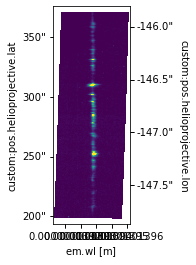

In [8]:
si94[267].plot(vmin=0,vmax=100)
plt.show()

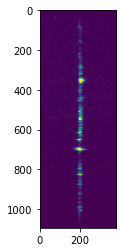

In [9]:
data94=np.array(si94[267].data)
plt.imshow(data94,vmin=0,vmax=100)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


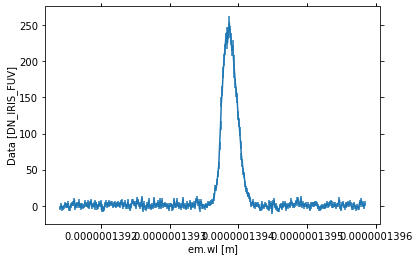

In [10]:
si94[267,350].plot()
plt.show()

In [11]:
(si94_wave,) = si94.axis_world_coords("wl")
si94_wave.to("m")

<SpectralCoord [1.39124699e-07, 1.39125971e-07, 1.39127243e-07, 1.39128515e-07,
   1.39129787e-07, 1.39131059e-07, 1.39132331e-07, 1.39133603e-07,
   1.39134875e-07, 1.39136147e-07, 1.39137419e-07, 1.39138691e-07,
   1.39139963e-07, 1.39141235e-07, 1.39142507e-07, 1.39143779e-07,
   1.39145051e-07, 1.39146323e-07, 1.39147595e-07, 1.39148867e-07,
   1.39150139e-07, 1.39151411e-07, 1.39152683e-07, 1.39153955e-07,
   1.39155227e-07, 1.39156499e-07, 1.39157771e-07, 1.39159043e-07,
   1.39160315e-07, 1.39161587e-07, 1.39162859e-07, 1.39164131e-07,
   1.39165403e-07, 1.39166675e-07, 1.39167947e-07, 1.39169219e-07,
   1.39170491e-07, 1.39171763e-07, 1.39173035e-07, 1.39174307e-07,
   1.39175579e-07, 1.39176851e-07, 1.39178123e-07, 1.39179395e-07,
   1.39180667e-07, 1.39181939e-07, 1.39183211e-07, 1.39184483e-07,
   1.39185755e-07, 1.39187027e-07, 1.39188299e-07, 1.39189571e-07,
   1.39190843e-07, 1.39192115e-07, 1.39193387e-07, 1.39194659e-07,
   1.39195931e-07, 1.39197203e-07, 1.39198475e-07

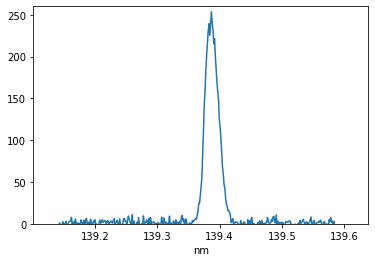

In [12]:
fig, ax = plt.subplots()
plt.plot(si94_wave.to("nm"), si94.data[267,350])
ax.set_ylim(0, 260)
ax.set_xlabel('nm')
plt.show()

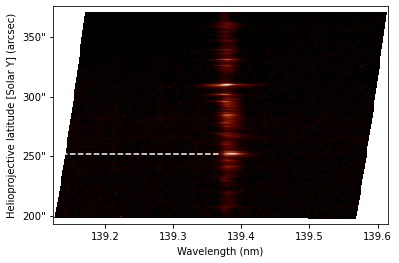

In [13]:
ny,nl=si94[267].data.shape

si94[267].plot(vmin=0, vmax=200, aspect="auto", cmap="irissji1400")
ax = plt.gca()
ax.coords[0].set_major_formatter("x.x")
ax.coords[0].set_format_unit(u.nm)
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Helioprojective latitude [Solar Y] (arcsec)")
# Remove longitude ticks
ax.coords[2].set_ticks([] * u.degree)
plt.plot([0,nl*.5],[350,350],'--',color='w')
plt.show()

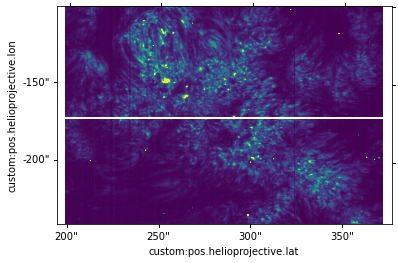

In [14]:
lower_corner = [SpectralCoord(139.38, unit=u.nm), None]
upper_corner = [SpectralCoord(139.38, unit=u.nm), None]
si94_crop=si94.crop(lower_corner, upper_corner)

ax = si94_crop.plot(vmin=0, vmax=200,aspect="auto")
plt.show()


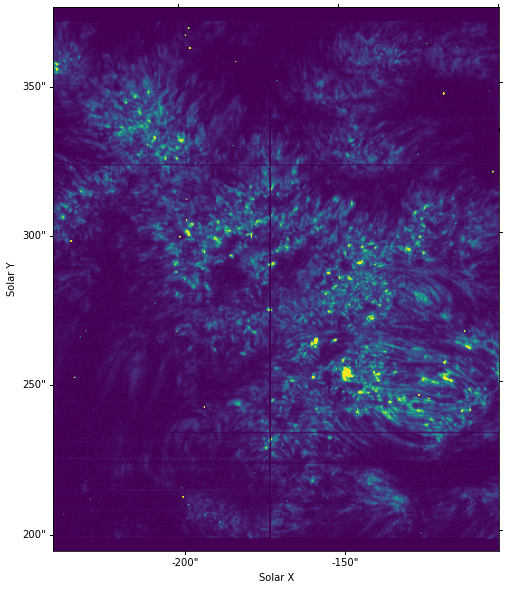

In [15]:
# need to transpose to get x,y correct

wcs_loc = si94.wcs.world_to_pixel(
    SpectralCoord(139.38, unit=u.nm),
    SkyCoord(0 * u.arcsec, 0 * u.arcsec, frame=Helioprojective),
)
si94_index = int(np.round(wcs_loc[0]))

figure = plt.figure(figsize=(8, 10))
ax = plt.subplot(projection=si94.wcs.dropaxis(0), slices=("y", "x"))
ax.imshow(si94.data[:, :, si94_index].T, vmin=0, vmax=200,aspect="auto",origin="lower")
ax.set_xlabel("Solar X")
ax.set_ylabel("Solar Y")
plt.show()

In [16]:
# Must be some irispy or wcs function that let's you specify a position 
# in solar x,y and gives you the array location in .data[t,y,:] as [t,y,l] ??

What about trying this using the appraoch pre-irispy?
https://iris.lmsal.com/itn41/reading_iris.html#Reading-level-2-raster-files

In [17]:
import astropy.io.fits as fits

In [18]:
sp = fits.open(rf)
# need memmap=True if too big a file???

In [19]:
hd = sp[0].header
print(hd['OBS_DESC'])
print(len(sp))
print(hd['NWIN'])

print('Window. Name      : wave start - wave end\n')
for i in range(hd['NWIN']):
    win = str(i + 1)
    print('{0}. {1:15}: {2:.2f} - {3:.2f} Å'
          ''.format(win, hd['TDESC' + win], hd['TWMIN' + win], hd['TWMAX' + win]))

Very large dense 400-step raster 131.7x175 400s   Deep x 15
10
7
Window. Name      : wave start - wave end

1. C II 1336      : 1331.81 - 1340.47 Å
2. O I 1356       : 1346.79 - 1357.47 Å
3. Si IV 1394     : 1391.25 - 1396.14 Å
4. Si IV 1403     : 1398.15 - 1406.70 Å
5. 2832           : 2831.28 - 2834.31 Å
6. 2814           : 2812.59 - 2816.43 Å
7. Mg II k 2796   : 2790.57 - 2809.94 Å


In [20]:
sp[3].data.shape

(400, 1095, 386)

In [21]:
from astropy.wcs import WCS
wcs = WCS(sp[3].header)
m_to_nm = 1e9  # convert wavelength to nm
nwave = sp[3].data.shape[2]
wavelength = wcs.all_pix2world(np.arange(nwave), [0.], [0.], 0)[0] * m_to_nm

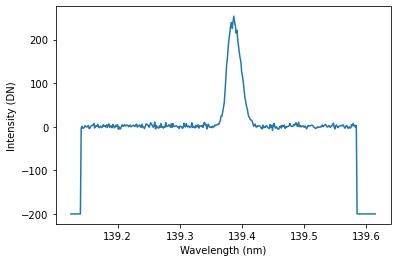

In [22]:
plt.plot(wavelength, sp[3].data[267, 350])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.show()

In [23]:
si94_index = np.argmin(np.abs(wavelength - 139.38))

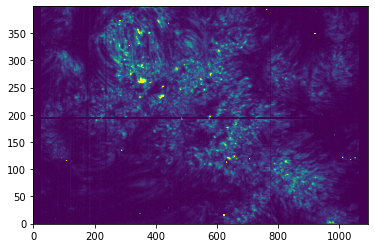

In [24]:
plt.imshow(sp[3].data[..., si94_index], vmin=0, vmax=200,aspect="auto",origin="lower")

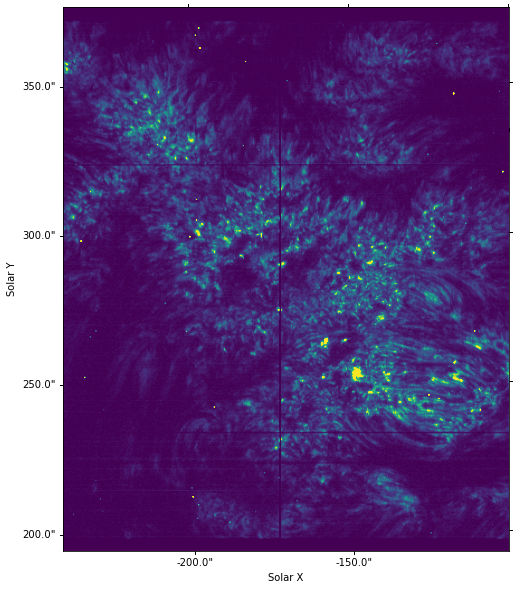

In [25]:
figure = plt.figure(figsize=(8, 10))
ax = plt.subplot(projection=wcs.dropaxis(0), slices=('y', 'x'))
ax.imshow(sp[3].data[..., si94_index].T, vmin=0, vmax=200,aspect="auto",origin="lower")
ax.coords[0].set_major_formatter('s.s')
ax.coords[1].set_major_formatter('s.s')
ax.set_xlabel("Solar X")
ax.set_ylabel("Solar Y")
plt.show()